<a href="https://colab.research.google.com/github/Anatoly333/Dogs_Babesiosis_Diagnostics/blob/main/Draw_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Библиотека для работы с матрицами
import numpy as np 

# Алгоритмы линейной алгебры
import scipy.linalg as sla

import math

import pandas as pd

In [2]:
data = pd.read_excel('data_all_no_emissions.xlsx')

In [3]:
data = data.drop(columns=['Болен или нет'])
data = data.drop(columns=['Гемоглобин (Hgb)'])

Начинаем

In [4]:
import random
from scipy.linalg import qr

x = []
y = []
help_array = []
i = 0
for i in range (7):
  a_x = random.randint(-5,5)
  a_y = random.randint(-5,5)
  help_array.append(a_x)
  help_array.append(a_y)
  x.append(a_x)
  y.append(a_y)
vector_x = np.array(x)
vector_y = np.array(y)
print(vector_x)
print(vector_y)

u1 = vector_x 
proj = np.dot(u1, vector_y) / np.dot(u1, u1) * u1 
u2 = vector_y - proj
print(u2)
norm = np.linalg.norm(u1)
print(norm)
e1 = u1 /  np.linalg.norm(u1)
e2 = u2 / np.linalg.norm(u2)
print(e1)
print(e2)

[ 2 -2 -3  1 -1  0 -1]
[-1  1 -2  4 -1  3  5]
[-1.2  1.2 -1.7  3.9 -0.9  3.   5.1]
4.47213595499958
[ 0.4472136  -0.4472136  -0.67082039  0.2236068  -0.2236068   0.
 -0.2236068 ]
[-0.15922347  0.15922347 -0.22556658  0.51747627 -0.1194176   0.39805867
  0.67669974]


In [14]:
data_std = data.copy()

i = 0
j = 0
names = data.columns

for i in range(7):
  std = float(np.std(data_std.iloc[:, [i]]))
  for j in range(len(data_std.iloc[:, [0]])):
    data_std[names[i]].iloc[j] = data_std.iloc[j][i] / std
print(data_std)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


     Эритроциты (RBC)  Лейкоциты (WBC)  Палочкоядерные нейтрофилы (Bands)  \
0            2.382512         1.962783                           1.171941   
1            3.721444         0.379174                           0.000000   
2            3.964289         0.646826                           0.703164   
3            2.901020         0.524152                           0.234388   
4            4.213698         0.579913                           0.000000   
..                ...              ...                                ...   
195          5.211334         1.070609                           0.000000   
196          3.970853         1.516696                           0.000000   
197          4.272769         1.037152                           0.000000   
198          1.864003         0.702587                           1.171941   
199          4.194008         0.468391                           0.000000   

     Сегментоядерные нейтрофилы (Segs)  Моноциты (Mono)  Тромбоциты (Plt)  

In [15]:
health_dogs = data_std[:136]
sick_dogs = data_std[136:]

In [16]:
vectors_array = []
i = 0
help_array = []
for i in range(200):
  help_array.append(np.dot(data_std.iloc[i], e1))
  help_array.append(np.dot(data_std.iloc[i], e2))
  vectors_array.append(list(help_array))
  help_array.clear()

In [17]:
x_array_health = []
y_array_health = []
x_array_sick = []
y_array_sick = []
i = 0

for i in range(136):
  x_array_health.append(np.dot(health_dogs.iloc[i], e1))
  y_array_health.append(np.dot(health_dogs.iloc[i], e2))
for i in range(64):
  x_array_sick.append(np.dot(sick_dogs.iloc[i], e1))
  y_array_sick.append(np.dot(sick_dogs.iloc[i], e2))
  

Text(0.5, 0, 'x_vector')

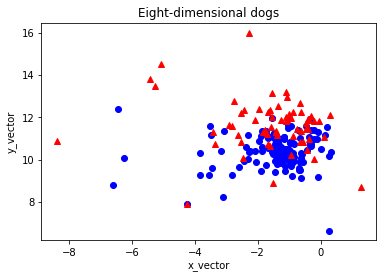

In [18]:
import matplotlib.pyplot as plt

plt.plot(x_array_health, y_array_health, 'bo', x_array_sick, y_array_sick, 'r^')
plt.title('Eight-dimensional dogs')
plt.ylabel('y_vector')
plt.xlabel('x_vector')